## Import Library

In [ ]:
!pip install pandas_datareader
!pip install yfinance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

## Import Data from Yahoo Finance

In [ ]:
def get_stock_prices(stock_symbol, start_date = '2023-01-01', end_date='2023-12-31'):
    '''
    'VOW.DE' : Volkswagen @ Frankfurt Stock Exchange (FSE)
    'VOD.L' : Vodafone Group plc @ London Stock Exchange
    'MC.PA': LVMH Moët Hennessy Louis Vuitton SE @ Euronext Paris
    '''

    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    closing_prices = stock_data['Adj Close']
    return closing_prices

## Black-Scholes Using Formula (Analytical)

### Option Price

In [ ]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

### Greeks

In [ ]:
# Example Greeks calculation
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def delta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1) - 1

def gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def theta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    return theta / 365  # Return theta per day

def theta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
    return theta / 365  # Return theta per day

def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T) * 0.01  # Return vega per 1% change in volatility

### Plotting the Results

In [ ]:
def plot_option_metrics(stock_prices, call_prices, put_prices, deltas_calls, deltas_puts,
                        thetas_calls, thetas_puts, gammas, vegas):
    plt.figure(figsize=(14, 14))
    # Plot for Call Prices
    plt.subplot(4, 2, 1)
    plt.plot(stock_prices, call_prices, label='Call Price')
    plt.title('Call Prices')
    plt.xlabel('Stock Price')
    plt.ylabel('Price')
    plt.legend()

    # Plot for Put Prices
    plt.subplot(4, 2, 2)
    plt.plot(stock_prices, put_prices, label='Put Price')
    plt.title('Put Prices')
    plt.xlabel('Stock Price')
    plt.ylabel('Price')
    plt.legend()

    # Plot for Delta Call
    plt.subplot(4, 2, 3)
    plt.plot(stock_prices, deltas_calls, label='Delta Call')
    plt.title('Delta Call')
    plt.xlabel('Stock Price')
    plt.ylabel('Delta Call')
    plt.legend()

    # Plot for Delta
    plt.subplot(4, 2, 4)
    plt.plot(stock_prices, deltas_puts, label='Delta Put')
    plt.title('Delta Put')
    plt.xlabel('Stock Price')
    plt.ylabel('Delta Put')
    plt.legend()

    # Plot for Theta Calls
    plt.subplot(4, 2, 5)
    plt.plot(stock_prices, thetas_calls, label='Theta Call')
    plt.title('Theta for Calls')
    plt.xlabel('Stock Price')
    plt.ylabel('Theta Call')
    plt.legend()

    # Plot for Theta Put
    plt.subplot(4, 2, 6)
    plt.plot(stock_prices, thetas_puts, label='Theta Put')
    plt.title('Theta for Put')
    plt.xlabel('Stock Price')
    plt.ylabel('Theta Put')
    plt.legend()

    # Plot for Gamma
    plt.subplot(4, 2, 7)
    plt.plot(stock_prices, gammas, label='Gamma')
    plt.title('Gamma')
    plt.xlabel('Stock Price')
    plt.ylabel('Gamma')
    plt.legend()

    # Plot for Vega
    plt.subplot(4, 2, 8)
    plt.plot(stock_prices, vegas, label='Vega')
    plt.title('Vega')
    plt.xlabel('Stock Price')
    plt.ylabel('Vega')
    plt.legend()

    plt.tight_layout()
    plt.show()


##  Black-Scholes Using Monte Carlo Simulation

### Implementation


In [ ]:
def monte_carlo_pricing(S, K, T, r, sigma, option_type='call', simulations=10000):
    np.random.seed(0)  # For reproducibility
    Z = np.random.standard_normal(simulations)  # Random samples from a standard normal distribution
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Simulated future stock prices
    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)  # Payoff for call option
    else:
        payoff = np.maximum(K - ST, 0)  # Payoff for put option
    price = np.exp(-r * T) * np.mean(payoff)  # Present value of the expected payoff
    return price

### PLot Results

In [ ]:
def plot_option_prices(closing_prices, K, T, r, sigma):
    # Calculate Monte Carlo prices
    monte_carlo_call_prices = [monte_carlo_pricing(s, K, T, r, sigma, option_type='call', simulations=10000) for s in closing_prices]
    monte_carlo_put_prices = [monte_carlo_pricing(s, K, T, r, sigma, option_type='put', simulations=10000) for s in closing_prices]

    # Calculate Black-Scholes analytical prices
    analytical_call_prices = [black_scholes_call(s, K, T, r, sigma) for s in closing_prices]
    analytical_put_prices = [black_scholes_put(s, K, T, r, sigma) for s in closing_prices]

    # plots for option price vs strike price
    S_constant = closing_prices.iloc[-1]  # Using the last closing price as the constant stock price
    strike_price_range = np.linspace(0.5 * S_constant, 1.5 * S_constant, 100)

    # Calculate option prices for a constant stock price across a range of strike prices
    monte_carlo_call_strike_prices = [monte_carlo_pricing(S_constant, k, T, r, sigma, option_type='call', simulations=10000) for k in strike_price_range]
    analytical_call_strike_prices = [black_scholes_call(S_constant, k, T, r, sigma) for k in strike_price_range]

    monte_carlo_put_strike_prices = [monte_carlo_pricing(S_constant, k, T, r, sigma, option_type='put', simulations=10000) for k in strike_price_range]
    analytical_put_strike_prices = [black_scholes_put(S_constant, k, T, r, sigma) for k in strike_price_range]


    # Plotting the call and put prices vs stock price
    # Plotting the call prices
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.plot(closing_prices, monte_carlo_call_prices, label='Monte Carlo Call Price')
    plt.plot(closing_prices, analytical_call_prices, label='Analytical Call Price', linestyle='--')
    plt.axvline(x=K, color='r', linestyle='--', label=f'Strike Price = {K}')
    plt.title('Call Option Prices vs Stock Price')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Price')
    plt.legend()

    # Plotting the put prices
    plt.subplot(2, 2, 2)
    plt.plot(closing_prices, monte_carlo_put_prices, label='Monte Carlo Put Price')
    plt.plot(closing_prices, analytical_put_prices, label='Analytical Put Price', linestyle='--')
    plt.axvline(x=K, color='r', linestyle='--', label=f'Strike Price = {K}')
    plt.title('Put Option Prices vs Stock Price')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Price')
    plt.legend()

    # Plotting the call and put prices vs strike price
    # plt.figure(figsize=(14, 7))
    plt.subplot(2, 2, 3)
    plt.plot(strike_price_range, monte_carlo_call_strike_prices, label='Monte Carlo Call Price')
    plt.plot(strike_price_range, analytical_call_strike_prices, label='Analytical Call Price', linestyle='--')
    plt.axvline(x=K, color='r', linestyle='--', label=f'Stock Price = {S_constant}')
    plt.title('Call Option Prices vs Strike Price')
    plt.xlabel('Strike Price')
    plt.ylabel('Option Price')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(strike_price_range, monte_carlo_put_strike_prices, label='Monte Carlo Put Price')
    plt.plot(strike_price_range, analytical_put_strike_prices, label='Analytical Put Price', linestyle='--')
    plt.axvline(x=K, color='r', linestyle='--', label=f'Stock Price = {S_constant}')
    plt.title('Put Option Prices vs Strike Price')
    plt.xlabel('Strike Price')
    plt.ylabel('Option Price')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Results

### Black Scholes and Greek

#### Case 1: Volkswagen

In [ ]:
closing_prices = get_stock_prices("VOW.DE")
log_returns = np.log(closing_prices / closing_prices.shift(1))
sigma = np.sqrt(252) * log_returns.std()
K = 210
T = 1
r = 0.05
print(f"Annualized Volatility: {sigma:.2%}")

# Use the entire array of closing prices for the calculations
call_prices = [black_scholes_call(s, K, T, r, sigma) for s in closing_prices]
put_prices = [black_scholes_put(s, K, T, r, sigma) for s in closing_prices]
deltas_calls = [delta_call(s, K, T, r, sigma) for s in closing_prices]
deltas_puts = [delta_put(s, K, T, r, sigma) for s in closing_prices]
thetas_calls = [theta_call(s, K, T, r, sigma) for s in closing_prices]
thetas_puts = [theta_put(s, K, T, r, sigma) for s in closing_prices]
vegas = [vega(s, K, T, r, sigma) for s in closing_prices]
gammas = [gamma(s, K, T, r, sigma) for s in closing_prices]

[*********************100%%**********************]  1 of 1 completed


Annualized Volatility: 25.71%


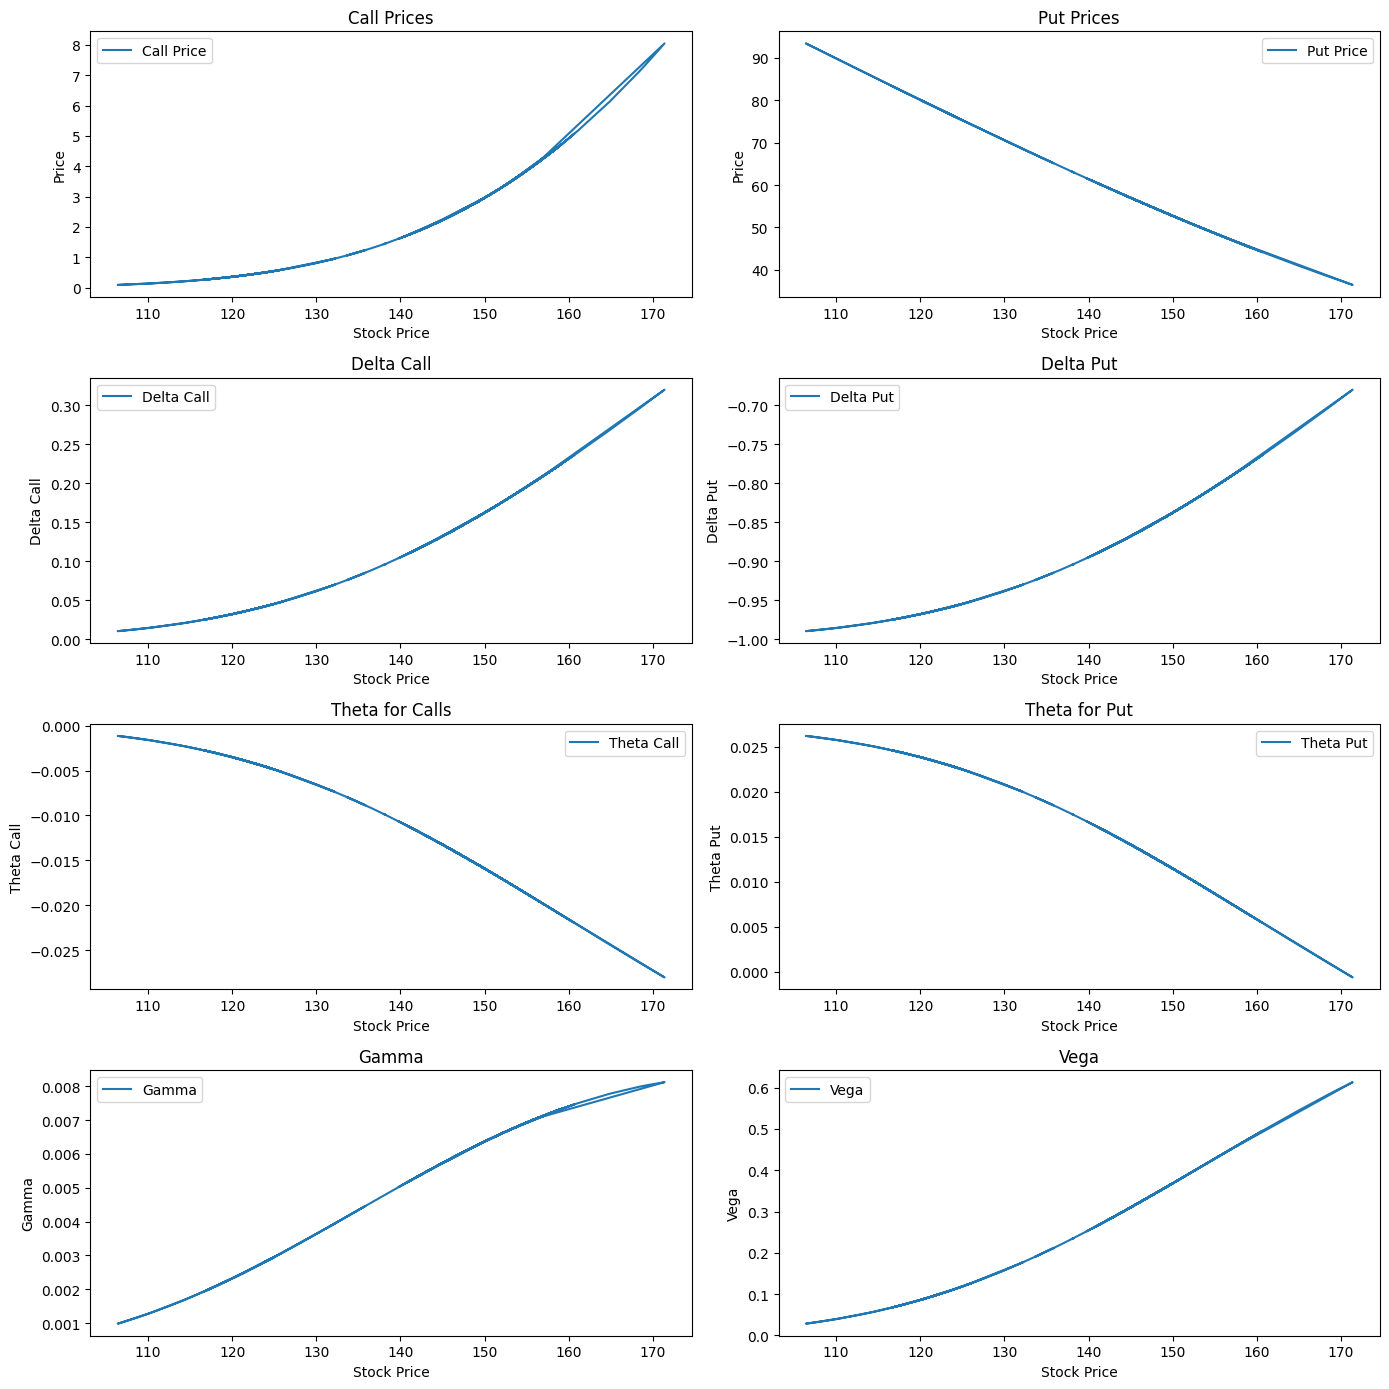

In [ ]:
plot_option_metrics(closing_prices, call_prices, put_prices, deltas_calls, deltas_puts, thetas_calls, thetas_puts, gammas, vegas)

#### Case 2: Vodafone

In [ ]:
closing_prices = get_stock_prices("VOD.L")
log_returns = np.log(closing_prices / closing_prices.shift(1))
sigma = np.sqrt(252) * log_returns.std()
K = 100
T = 1
r = 0.05
print(f"Annualized Volatility: {sigma:.2%}")

# Use the entire array of closing prices for the calculations
call_prices = [black_scholes_call(s, K, T, r, sigma) for s in closing_prices]
put_prices = [black_scholes_put(s, K, T, r, sigma) for s in closing_prices]
deltas_calls = [delta_call(s, K, T, r, sigma) for s in closing_prices]
deltas_puts = [delta_put(s, K, T, r, sigma) for s in closing_prices]
thetas_calls = [theta_call(s, K, T, r, sigma) for s in closing_prices]
thetas_puts = [theta_put(s, K, T, r, sigma) for s in closing_prices]
vegas = [vega(s, K, T, r, sigma) for s in closing_prices]
gammas = [gamma(s, K, T, r, sigma) for s in closing_prices]

[*********************100%%**********************]  1 of 1 completed


Annualized Volatility: 25.78%


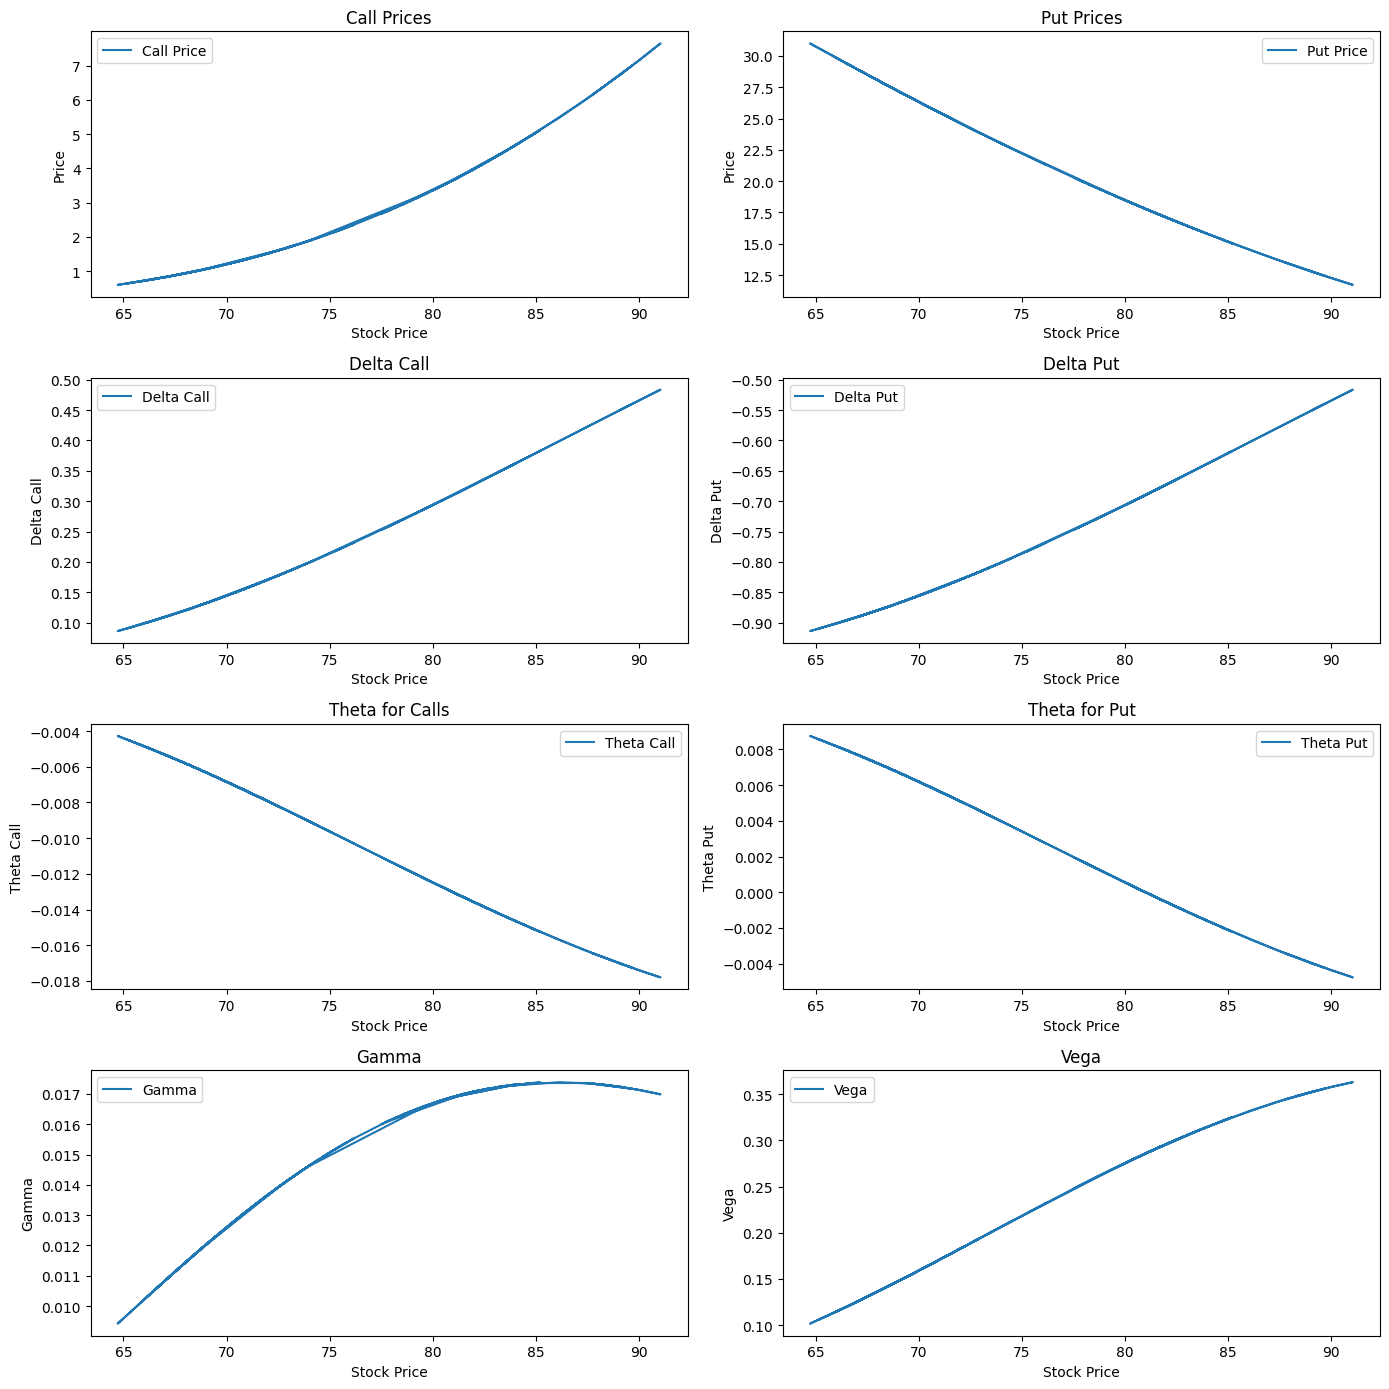

In [ ]:
plot_option_metrics(closing_prices, call_prices, put_prices, deltas_calls, deltas_puts, thetas_calls, thetas_puts, gammas, vegas)

### Monte Carlo vs Analytical Results

#### Case 1: Volkswagen

[*********************100%%**********************]  1 of 1 completed


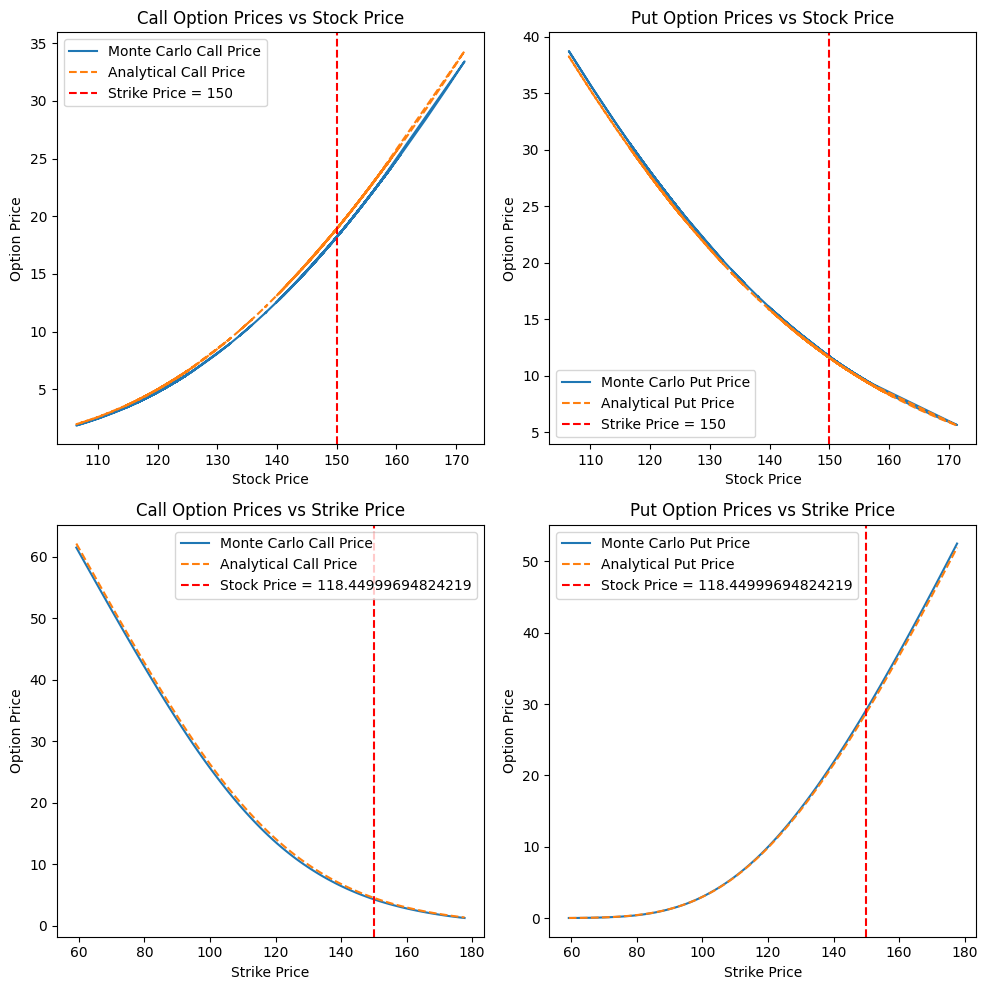

In [ ]:
closing_prices = get_stock_prices("VOW.DE")
log_returns = np.log(closing_prices / closing_prices.shift(1))
sigma = np.sqrt(252) * log_returns.std()
K = 150
T = 1
r = 0.05

plot_option_prices(closing_prices, K, T, r, sigma)

#### Case 2: Vodafone

[*********************100%%**********************]  1 of 1 completed


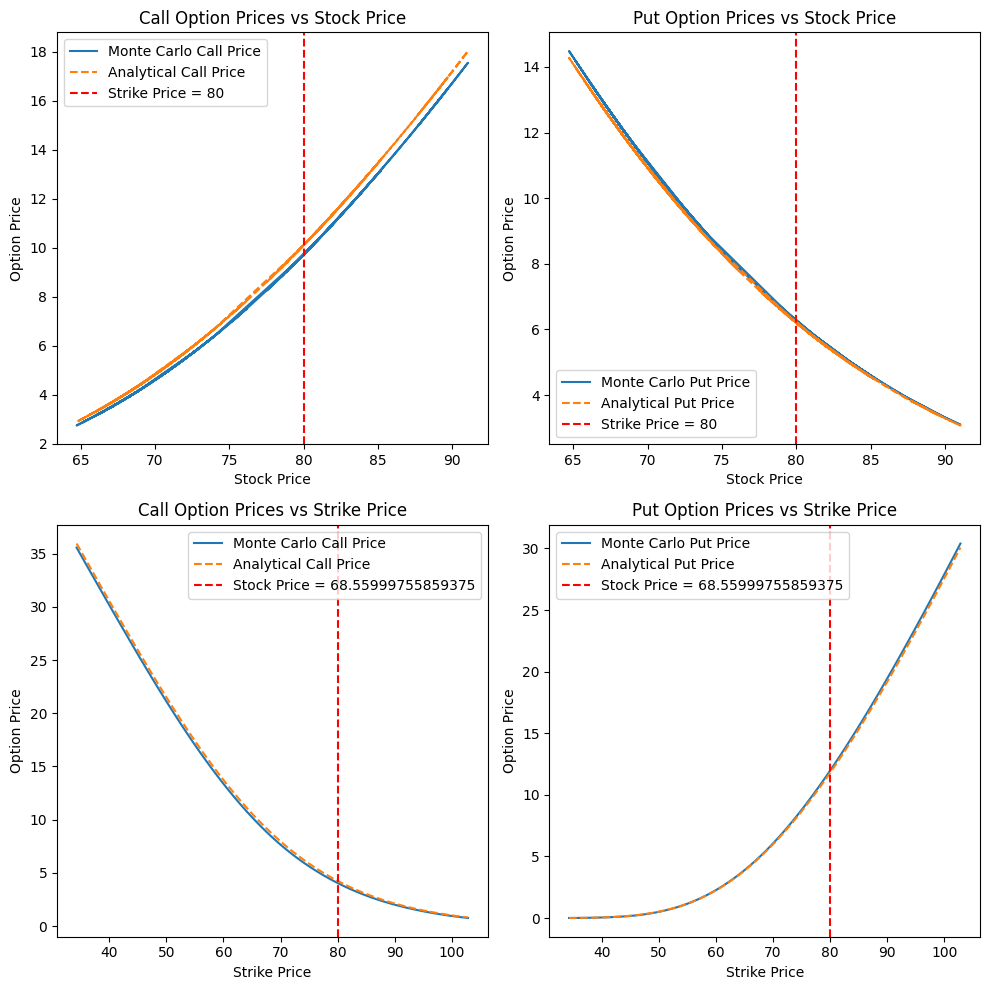

In [ ]:
closing_prices = get_stock_prices("VOD.L")
log_returns = np.log(closing_prices / closing_prices.shift(1))
sigma = np.sqrt(252) * log_returns.std()
K = 80
T = 1
r = 0.05

plot_option_prices(closing_prices, K, T, r, sigma)